<a href="https://colab.research.google.com/github/AmandeepSingh789/AmandeepSingh789/blob/main/feed_forward_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_hub as hub
from imblearn.over_sampling import RandomOverSampler

In [ ]:
 df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


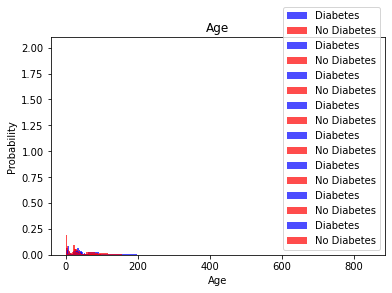

In [ ]:
for i in range (len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color='blue',label="Diabetes",alpha=0.7,density=True,bins=15)
  plt.hist(df[df['Outcome']==0][label],color='red',label="No Diabetes",alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()


In [ ]:
# Getting the input and output values for the model
X= df[df.columns[:-1]].values
y=df[df.columns[-1]].values



In [ ]:
X.shape ,y.shape

((768, 8), (768,))

In [ ]:
# Standardizing Data
scaler=StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [51]:
# Standardizing outcomes so there are similar amount of cases for each outcome
over = RandomOverSampler()
X,y = over.fit_resample(X,y)
data = np.hstack((X,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [52]:
len(transformed_df[transformed_df["Outcome"]==1]),len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [53]:
# Dividing data into training and testing set and then further
# dividing testing set into testing set and validation set
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.4,random_state=0)
X_valid,X_test,y_valid,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=0)

In [54]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(16, activation='relu'), # if x<=0 -->0, x>0 -->x
                           tf.keras.layers.Dense(16, activation='relu'),
                           tf.keras.layers.Dense(1, activation='sigmoid') # range[0,1]
                           
])

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [56]:
model.evaluate(X_train,y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.7342 - accuracy: 0.5017


[0.734161913394928, 0.5016666650772095]

In [57]:
model.evaluate(X_valid,y_valid)

7/7 [==============================] - 0s 3ms/step - loss: 0.7686 - accuracy: 0.4750


[0.7685836553573608, 0.4749999940395355]

In [58]:
model.fit(X_train,y_train,batch_size=16,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.6884 - accuracy: 0.5383 - val_loss: 0.6643 - val_accuracy: 0.5900
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.6817 - val_loss: 0.6107 - val_accuracy: 0.6950
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.7050 - val_loss: 0.5752 - val_accuracy: 0.7000
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5518 - accuracy: 0.7217 - val_loss: 0.5502 - val_accuracy: 0.7050
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5344 - accuracy: 0.7317 - val_loss: 0.5293 - val_accuracy: 0.7250
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5218 - accuracy: 0.7467 - val_loss: 0.5134 - val_accuracy: 0.7350
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.7483 - val_loss: 0.5019 - val_accuracy: 0.7400
Epoch 8/20
38/38 [==

In [59]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.4640 - accuracy: 0.7650


[0.46396756172180176, 0.7649999856948853]